In [1]:
# Copyright © 2019 Ehsan Khatami

import numpy as np
from scipy.optimize import minimize
from pylab import *
import random

In [12]:
# Data sizes
N_data  = 20000
N_train = 5000
N_test  = N_data - N_train

# Network parameters:
# Number of input parameters
N_in  = 2
# Number of neurons in the hidden layer
N_hid = 3
# Number of output neurons
N_out = 2

# This is the total number of free parameters (weights and biases)
nparams = (N_in+N_out+1)*N_hid+N_out

# This is for the optimization function
tol = 1e-2

In [13]:
# Generating the data (two number to be multiplied) and their labels (their product)
data  = np.random.random(size=2*N_data).reshape(N_data,2)

labels = np.zeros([N_data,2])
labels[:,0] = data[:,0]*data[:,1]

# This is becuase we have chosen two neurons for the output, and that
# the activation function is softmax (see below)
labels[:,1] = 1 - labels[:,0]

In [14]:
def sigmoid(x):
    return 1.0/(1.0 + np.exp(-x))

In [15]:
def softmax(x):
    z = sum(np.exp(x))
    return np.exp(x)/z

In [16]:
# A bunch of linear algebra to get from the input to the output 
# knowing all the weights and biases
def run_network_fc1(data_in):
    first  = sigmoid(np.matmul(data_in,weights1)+biases1)
    output = softmax(np.matmul(first,weights2)+biases2)
    return output

In [17]:
# This is to place the network parameters from P into their 
# respective arrays after optimization
def unroll(p):
    
    global weights1, biases1, weights2, biases2
    
    # Unpacking the parameters (P) into weights and biases
    k = 0
    for i in range(N_in):
        for j in range(N_hid):
            weights1[i,j] = p[k]
            k = k + 1
            
    for i in range(N_hid):
        biases1[i] = p[k]
        k = k + 1

    for i in range(N_hid):
        for j in range(N_out):
            weights2[i,j] = p[k]
            k = k + 1
            
    for i in range(N_out):
        biases2[i] = p[k]
        k = k + 1
        
    return weights1, biases1, weights2, biases2

In [18]:
# The cost function
def cost(p):
    
    global weights1, biases1, weights2, biases2
    
    weights1, biases1, weights2, biases2 = unroll(p)
        
    loss = 0.0
    for i in range(N_train):
        data_in = data[i,:]
        output = run_network_fc1(data_in)
        loss += sum(abs(labels[i,:] - output[:]))
        #loss -= sum(output[:]*np.log(labels[i,:]) + (1-output[:])*np.log(1-labels[i,:]))
    loss /= N_train
    
    return loss

In [19]:
weights1 = np.zeros([N_in,N_hid]) 
biases1  = np.zeros([N_hid])
weights2 = np.zeros([N_hid,N_out])
biases2  = np.zeros([N_out])

p = 2*np.random.random(size=nparams)-1
print('Initial cost:', cost(p))

# This is where leanrning takes place!
res = minimize(cost,p,tol=tol)
p = res.x 

print('Final cost:', res.fun, "# of iterations:", res.nit)

Initial cost: 0.5143639623891822
Final cost: 0.019962453490221906 # of iterations: 396


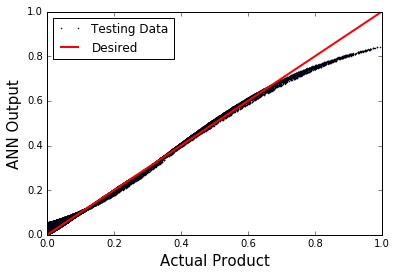

In [20]:
# Testing the trained network
actual = np.zeros(N_test)
ann_out = np.zeros(N_test)

for i in range(N_train,N_data):
    data_in = data[i,:]
    output = run_network_fc1(data_in)
    
    actual[i-N_train]  = data_in[0]*data_in[1]
    ann_out[i-N_train] = output[0]
    
plot(actual,ann_out,'ob', ms=1, label='Testing Data')
plot([0,1],[0,1],'-r', linewidth=2, label='Desired')
xlim([0,1])
ylim([0,1])
xlabel('Actual Product', fontsize=15)
ylabel('ANN Output', fontsize=15)
legend(loc='upper left')
show()